In [70]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("C:/Users/tushar.mane_embibe/Downloads/Thailand/thailand_domestic_tourism_2019_2023.csv")
print(df.shape)
df.head()

(30800, 7)


,date,province_thai,province_eng,region_thai,region_eng,variable,value
0,2019-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,occupancy_rate,93.37
1,2019-01-01,ลพบุรี,Lopburi,ภาคกลาง,central,occupancy_rate,61.32
2,2019-01-01,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,ภาคกลาง,central,occupancy_rate,73.37
3,2019-01-01,สระบุรี,Saraburi,ภาคกลาง,central,occupancy_rate,67.33
4,2019-01-01,ชัยนาท,Chainat,ภาคกลาง,central,occupancy_rate,79.31


In [22]:
print(df['variable'].unique())

['occupancy_rate' 'no_tourist_occupied' 'no_tourist_all' 'no_tourist_thai'
 'no_tourist_foreign' 'net_profit_all' 'net_profit_thai'
 'net_profit_foreign']


In [18]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date             datetime64[ns]
province_thai            object
province_eng             object
region_thai              object
region_eng               object
variable                 object
value                   float64
dtype: object

In [56]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.strftime('%B')
df.head()

,date,province_thai,province_eng,region_thai,region_eng,variable,value,year,month,month_name
0,2019-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,occupancy_rate,93.37,2019,1,January
1,2019-01-01,ลพบุรี,Lopburi,ภาคกลาง,central,occupancy_rate,61.32,2019,1,January
2,2019-01-01,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,ภาคกลาง,central,occupancy_rate,73.37,2019,1,January
3,2019-01-01,สระบุรี,Saraburi,ภาคกลาง,central,occupancy_rate,67.33,2019,1,January
4,2019-01-01,ชัยนาท,Chainat,ภาคกลาง,central,occupancy_rate,79.31,2019,1,January


In [114]:
month_list = df['variable'].unique().tolist()
month_list

['occupancy_rate',
 'no_tourist_occupied',
 'no_tourist_all',
 'no_tourist_thai',
 'no_tourist_foreign',
 'net_profit_all',
 'net_profit_thai',
 'net_profit_foreign']

In [60]:
df[df['year']==2023]['month_name'].unique()

array(['January', 'February'], dtype=object)

In [123]:
df_test = df.loc[
    (df['province_eng'] == 'Bangkok') & 
    (df['year'] == 2019) & 
    (df['month'] == 1) & 
    (df['variable'].isin(['no_tourist_all', 'no_tourist_thai', 'no_tourist_foreign']))
]

df_test

,date,province_thai,province_eng,region_thai,region_eng,variable,value,year,month,month_name
7700,2019-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_all,5959075.0,2019,1,January
11550,2019-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_thai,3534061.0,2019,1,January
15400,2019-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_foreign,2425014.0,2019,1,January


In [64]:
df_2019 = df.loc[df['year'].isin([2019])]

In [69]:
monthly_2019 = df_2019.loc[df_2019['variable'].isin(['net_profit_all'])].groupby('month').sum().drop(['year'],axis=1).reset_index()
monthly_2019

,month,value
0,1,257559.91
1,2,231239.97
2,3,233165.20
3,4,227588.80
4,5,206090.92
5,6,194711.77
6,7,203594.97
7,8,198933.25
8,9,194469.80
9,10,241510.77


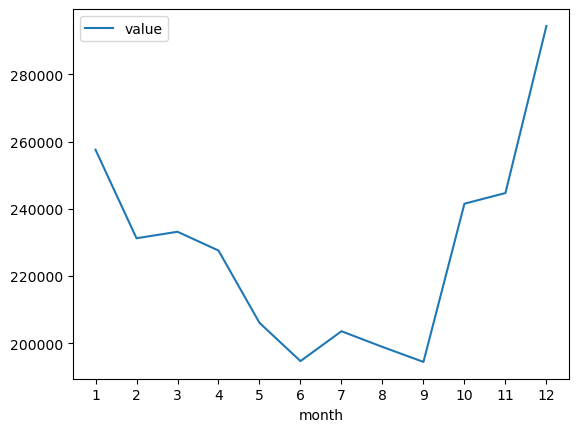

In [94]:
fig = monthly_2019.plot(x='month', y='value')
fig.set_xticks(monthly_2019['month']);

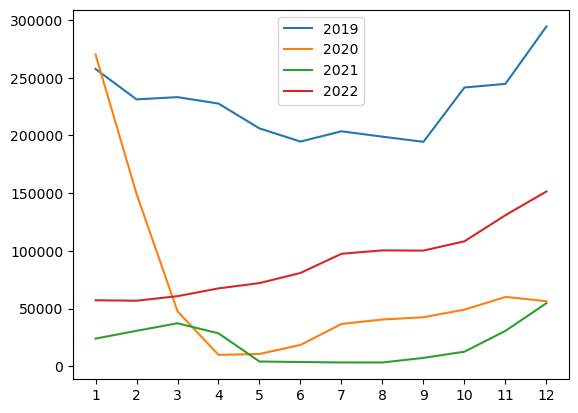

In [113]:
# create a figure object and axis object
fig, ax = plt.subplots()

# loop through the years and plot each year's monthly data on the same subplot
for year in df['year'].unique():
    if year !=2023:
        yearly = df.loc[df['year'].isin([year])]
        monthly = yearly.loc[yearly['variable'].isin(['net_profit_all'])].groupby('month').sum().drop(['year'],axis=1).reset_index()

        # plot the monthly data for this year on the same subplot
        ax.plot(monthly['month'], monthly['value'], label=year)
        ax.set_xticks(monthly['month'])
        ax.legend()

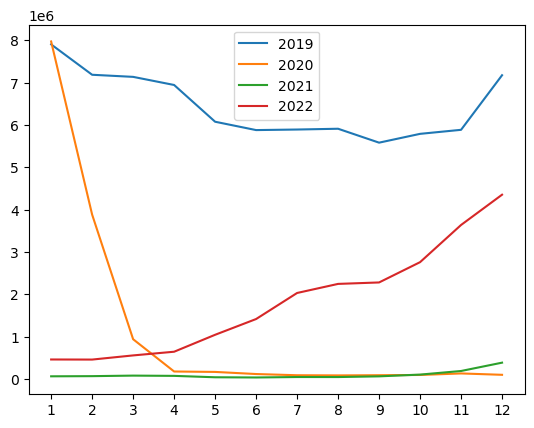

In [116]:
# create a figure object and axis object
fig, ax = plt.subplots()

# loop through the years and plot each year's monthly data on the same subplot
for year in df['year'].unique():
    if year !=2023:
        yearly = df.loc[df['year'].isin([year])]
        monthly = yearly.loc[yearly['variable'].isin(['no_tourist_foreign'])].groupby('month').sum().drop(['year'],axis=1).reset_index()

        # plot the monthly data for this year on the same subplot
        ax.plot(monthly['month'], monthly['value'], label=year)
        ax.set_xticks(monthly['month'])
        ax.legend()

In [124]:
df_2019.head()

,date,province_thai,province_eng,region_thai,region_eng,variable,value,year,month,month_name
0,2019-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,occupancy_rate,93.37,2019,1,January
1,2019-01-01,ลพบุรี,Lopburi,ภาคกลาง,central,occupancy_rate,61.32,2019,1,January
2,2019-01-01,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,ภาคกลาง,central,occupancy_rate,73.37,2019,1,January
3,2019-01-01,สระบุรี,Saraburi,ภาคกลาง,central,occupancy_rate,67.33,2019,1,January
4,2019-01-01,ชัยนาท,Chainat,ภาคกลาง,central,occupancy_rate,79.31,2019,1,January


In [129]:
df_2019_tourist = df_2019[df_2019['variable'].isin(['no_tourist_all', 'no_tourist_thai', 'no_tourist_foreign'])]
df_2019_tourist = df_2019_tourist.groupby(['region_eng','variable']).sum().reset_index()
df_2019_tourist.drop(['year','month'],axis =1, inplace = True)
df_2019_tourist

,region_eng,variable,value
0,central,no_tourist_all,133115786.0
1,central,no_tourist_foreign,31854847.0
2,central,no_tourist_thai,101260939.0
3,east,no_tourist_all,41761815.0
4,east,no_tourist_foreign,11635308.0
5,east,no_tourist_thai,30126507.0
6,east_northeast,no_tourist_all,42317501.0
7,east_northeast,no_tourist_foreign,1748844.0
8,east_northeast,no_tourist_thai,40568657.0
9,north,no_tourist_all,36012649.0


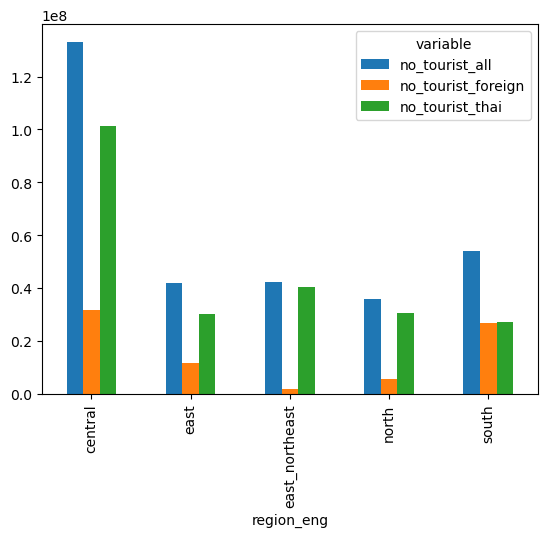

In [137]:
pivot = df_2019_tourist.pivot(index = 'region_eng', columns = 'variable', values = 'value')
fig = pivot.plot.bar()

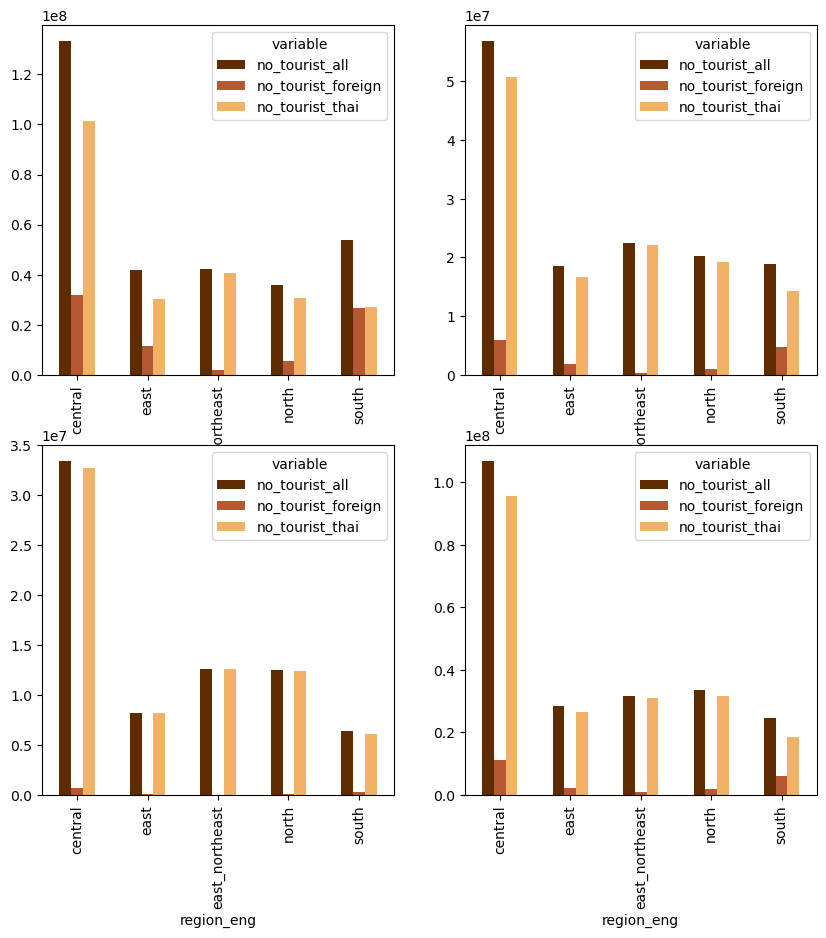

In [142]:
import matplotlib.pyplot as plt
colors = ['#5f2c00','#b45932','#f2b266']

# create a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i, year in enumerate(df['year'].unique()):
    if year !=2023:
        df_yearly = df.loc[df['year']==year]
        
        df_tourist = df_yearly[df_yearly['variable'].isin(['no_tourist_all', 'no_tourist_thai', 'no_tourist_foreign'])]
        df_tourist = df_tourist.groupby(['region_eng','variable']).sum().reset_index()
        df_tourist.drop(['year','month'],axis =1, inplace = True)
        pivot = df_tourist.pivot(index = 'region_eng', columns = 'variable', values = 'value')
    
    
    # plot the data on the i-th subplot
        ax = axes[i//2][i%2]
        pivot.plot(kind='bar', ax=ax, color = colors)
        

In [144]:
df_2023 = df[df['year']==2023]
df = df[df['year'] != 2023]

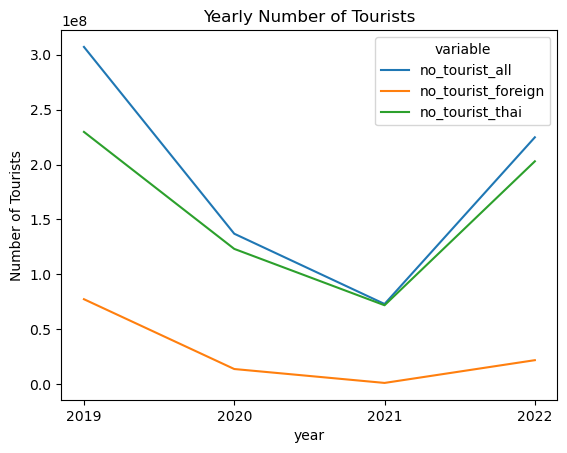

In [153]:
tourist_list = ['no_tourist_all','no_tourist_foreign','no_tourist_thai']
yearly_tourist = df.loc[df['variable'].isin(tourist_list)].groupby(['year','variable']).sum().reset_index().drop('month',axis=1)
yearly_pivot = yearly_tourist.pivot(index = 'year', columns = 'variable', values = 'value')

fig = yearly_pivot.plot()
fig.set_xticks(yearly_pivot.index);
plt.title('Yearly Number of Tourists')
plt.ylabel('Number of Tourists');
plt.xlabel('Year')

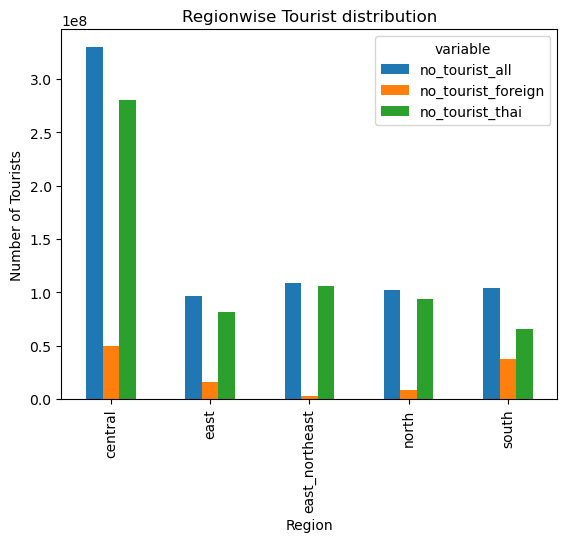

In [159]:
#region wise
regionwise = df.loc[df['variable'].isin(tourist_list)].groupby(['region_eng','variable']).sum().reset_index().drop('month',axis = 1)
region_pivot = regionwise.pivot(index = 'region_eng', columns = 'variable', values = 'value')
region_pivot.plot(kind = 'bar');
plt.xlabel('Region')
plt.title('Regionwise Tourist distribution')
plt.ylabel('Number of Tourists');

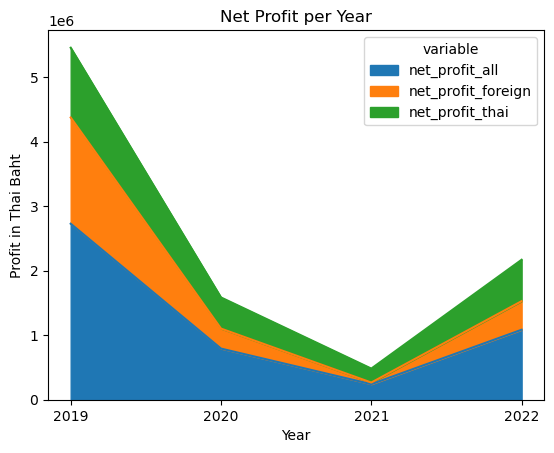

In [164]:
#Net profit
profit_list = ['net_profit_all', 'net_profit_thai', 'net_profit_foreign']
profit_df = df.loc[df['variable'].isin(profit_list)].groupby(['year', 'variable']).sum().reset_index().drop('month', axis = 1)
profit_pivot = profit_df.pivot(index = 'year', columns = 'variable', values = 'value')
profit_pivot.plot(kind = 'area');
plt.title('Net Profit per Year')
plt.xticks(profit_pivot.index);
plt.xlabel('Year')
plt.ylabel('Profit in Thai Baht');

Text(0, 0.5, 'Profit in Thai Baht')

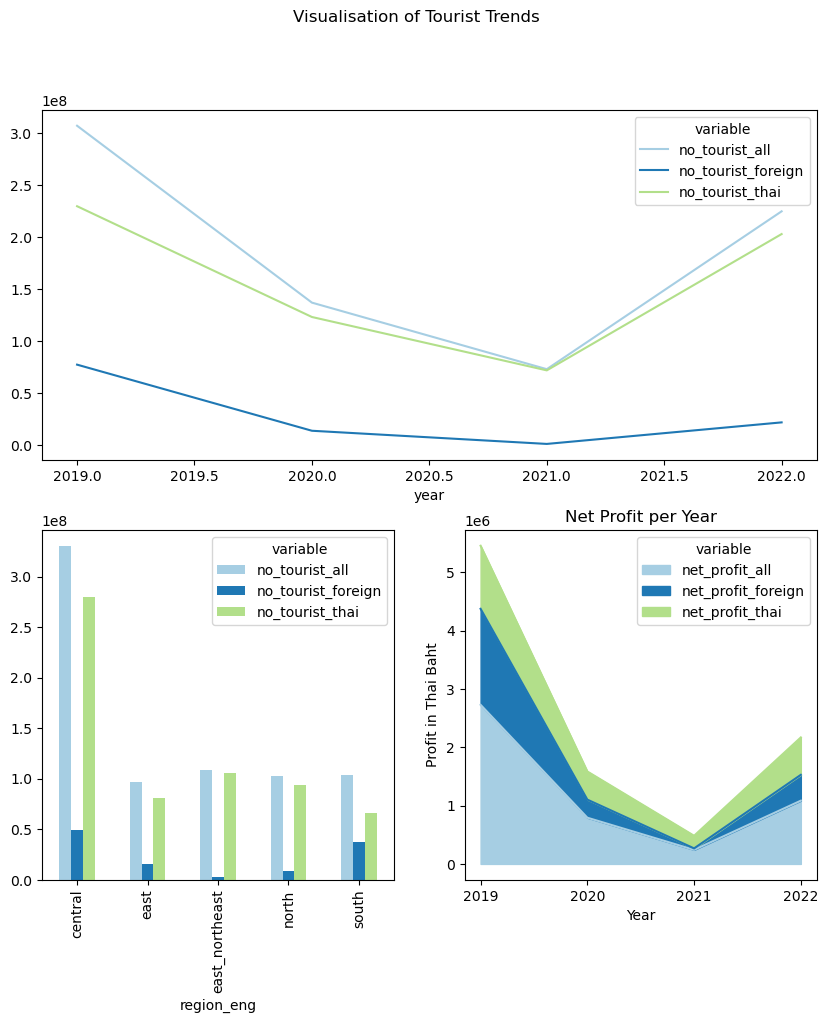

In [180]:
import seaborn as sns

fig = plt.figure(figsize = (10, 10))
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
fig.suptitle('Visualisation of Tourist Trends')
fig.tight_layout

colors = sns.color_palette('Paired', n_colors=6)


tourist_list = ['no_tourist_all','no_tourist_foreign','no_tourist_thai']
yearly_tourist = df.loc[df['variable'].isin(tourist_list)].groupby(['year','variable']).sum().reset_index().drop('month',axis=1)
yearly_pivot = yearly_tourist.pivot(index = 'year', columns = 'variable', values = 'value')

yearly_pivot.plot(kind = 'line', ax =ax1, color = colors)
plt.xticks(yearly_pivot.index);
plt.title('Yearly Number of Tourists')
plt.ylabel('Number of Tourists')
plt.xlabel('Year')

#region wise
regionwise = df.loc[df['variable'].isin(tourist_list)].groupby(['region_eng','variable']).sum().reset_index().drop('month',axis = 1)
region_pivot = regionwise.pivot(index = 'region_eng', columns = 'variable', values = 'value')
region_pivot.plot(kind = 'bar', ax = ax2, color = colors);
plt.xlabel('Region')
plt.title('Regionwise Tourist distribution')
plt.ylabel('Number of Tourists')

#Net profit
profit_list = ['net_profit_all', 'net_profit_thai', 'net_profit_foreign']
profit_df = df.loc[df['variable'].isin(profit_list)].groupby(['year', 'variable']).sum().reset_index().drop('month', axis = 1)
profit_pivot = profit_df.pivot(index = 'year', columns = 'variable', values = 'value')
profit_pivot.plot(kind = 'area', ax = ax3, color = colors);
plt.title('Net Profit per Year')
plt.xticks(profit_pivot.index);
plt.xlabel('Year')
plt.ylabel('Profit in Thai Baht')

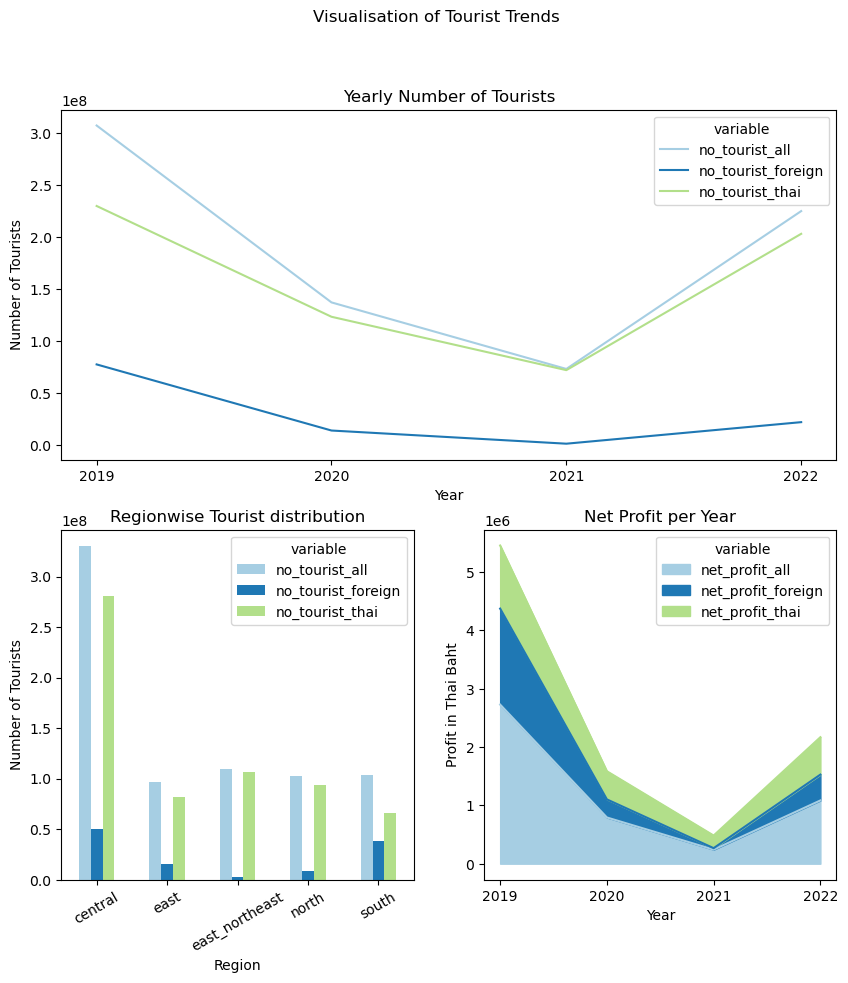

In [185]:
import seaborn as sns

fig = plt.figure(figsize = (10, 10))
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
fig.suptitle('Visualisation of Tourist Trends')
fig.tight_layout

colors = sns.color_palette('Paired', n_colors=6)

tourist_list = ['no_tourist_all','no_tourist_foreign','no_tourist_thai']
yearly_tourist = df.loc[df['variable'].isin(tourist_list)].groupby(['year','variable']).sum().reset_index().drop('month',axis=1)
yearly_pivot = yearly_tourist.pivot(index = 'year', columns = 'variable', values = 'value')

yearly_pivot.plot(kind = 'line', ax =ax1, color = colors)
ax1.set_xticks(yearly_pivot.index);
ax1.set_title('Yearly Number of Tourists')
ax1.set_ylabel('Number of Tourists')
ax1.set_xlabel('Year')

#region wise
regionwise = df.loc[df['variable'].isin(tourist_list)].groupby(['region_eng','variable']).sum().reset_index().drop('month',axis = 1)
region_pivot = regionwise.pivot(index = 'region_eng', columns = 'variable', values = 'value')
region_pivot.plot(kind = 'bar', ax = ax2, color = colors);
ax2.set_xticklabels(region_pivot.index, rotation=30)
ax2.set_xlabel('Region')
ax2.set_title('Regionwise Tourist distribution')
ax2.set_ylabel('Number of Tourists')

#Net profit
profit_list = ['net_profit_all', 'net_profit_thai', 'net_profit_foreign']
profit_df = df.loc[df['variable'].isin(profit_list)].groupby(['year', 'variable']).sum().reset_index().drop('month', axis = 1)
profit_pivot = profit_df.pivot(index = 'year', columns = 'variable', values = 'value')
profit_pivot.plot(kind = 'area', ax = ax3, color = colors);
ax3.set_title('Net Profit per Year')
ax3.set_xticks(profit_pivot.index);
ax3.set_xlabel('Year')
ax3.set_ylabel('Profit in Thai Baht');
